<h1><b>EDA to Typhoon Mitigation and Response Framework (TMRF) </b></h1>

<i>“Experience is a master teacher, even when it’s not our own.”</i>
― Gina Greenlee

<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The Philippines' apparent vulnerability to natural disasters emerges from its geographic location within the Pacific Ring of Fire. The country is surrounded by large bodies of water and faces the Pacific Ocean, which produces 60% of the world's typhoons. Approximately twenty tropical cyclones pass through the Philippine area of responsibility each year, ten of which are typhoons and five of which are catastrophic (Brown, 2013). Due to a lack of preparedness and response, families in rural areas are more likely to be hit. According to the Weather Underground (n.d.), hurricanes are becoming a global threat as they solidify and more super tropical storms emerge. As a result, every municipality should have a high level of safety and security. However, government agencies and non-governmental organizations in the Philippines promote emergency preparedness, but they have yet to acquire the public's general attention like in Yolanda’s storm surge disaster where there is insufficient public awareness of storm surges, higher casualties have occurred (Commision on Audit, n.d.). The Commission on Audit also reported that the mayor of Tacloban City had stated that more lives may have been saved if storm surges were labeled as tsunami-like in nature. According to the National Research Council et al. (n.d.), preparedness is indeed the way of transforming a community's awareness of potential natural hazards into actions that strengthen its ability to respond to and recover from disasters and proposals for preparedness must address the immediate response and all the longer-term recovery and rehabilitation. </p>

<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The objective of this analysis is to construct an Exploratory Data Analysis to Typhoons from the year 2019 that prompted the most casualty rates in the country and data on the municipal governments that had the least number of affected families’ individuals per typhoon in the Philippines. Moreover, a global dataset from 2000-2022 about hurricanes in the U.S. from the Centre for Research on the Epidemiology of Disasters' Emergency Events Database (EM-DAT) will be utilized in the same manner as mentioned in the Philippines Data set to know which Location in the United States had the most successful response and mitigation plan for typhoons. This information will be used to construct a Typhoon Mitigation and Response Plan that may help the Philippines deal with hurricanes. Integrating various programs from other countries will increase the likelihood of Filipinos' survival and recovery from typhoons. </p>

<pre>
<h2><b>Contents of the Notebook:</b></h2>

   P. Philippines Data set 2019
      p1. Analysis of the features and X variables.
      p2. Selection of X variables to be used for the analysis.
      p3. Converting the data from the excel sheet data set to a pandas data frame.
      p4. Data Cleaning
      p5. Statistical Overview and Correlation Analysis of the featured X variables.'
      p6. Data Analysis

          Format for every objectives:  Objective
                                        Codes
                                        Outputs
                                        Analysis and Observation
                                        Recommendations

   a. American Data set 2000-2022
      a1. Analysis of the features and X variables.
      a2. Converting the data from the excel sheet data set to a pandas data frame.
      a3. Selection of X variables to be used for the analysis.
      a4. Dataframe Normalization
      a5. Data Cleaning
      a6. Statistical Overview and Correlation Analysis of the featured X variables.'
      a7. Data Analysis

          Format for every objectives:  Objective
                                        Codes
                                        Outputs
                                        Analysis and Observation
                                        Recommendations
</pre>

Humanitarian Data Exchange Data set about Philippines (2019)

In [233]:
#These scripts would be coded to call all python modules who will be of used for the data analysis. 
import pandas as pd #Importing the matplotlib library and renaming it as plt.
import numpy as np
import matplotlib.pyplot as plt #Importing pandas library
import seaborn as sns
from matplotlib import cm
from pandas.plotting import scatter_matrix
import plotly.express as px
from IPython.display import display, Markdown

<h3><b> p1. Analysis of the features and X variables.</b></h3>




In [234]:
data=pd.read_excel(r'200204_philippines-2019-events-data.xlsx_3FAWSAccessKeyId=AKIAXYC32WNARK756OUG_Expires=1644193427_Signature=hFTPcWroN6S3M2pX40ObWvu24p8=.xlsx', sheet_name="Tropical Cyclones")

data.info() # info() function was used to get an initial reading from the excel sheet data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Region                    686 non-null    object        
 1   Region code               686 non-null    object        
 2   Province                  686 non-null    object        
 3   Province code             686 non-null    object        
 4   City_Mun                  686 non-null    object        
 5   City_Mun code             686 non-null    object        
 6   Year                      687 non-null    int64         
 7   Incident                  687 non-null    object        
 8   Date Occurred             687 non-null    datetime64[ns]
 9   2015 Population           687 non-null    int64         
 10  Affected_FAM              687 non-null    int64         
 11  Affected_PERs2            687 non-null    object        
 12  Affected_PERs         

<h4><b>Types Of Features </b></h4>

<b>Nominal Features:</b>
<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A nominal variable is one that describes an unordered term, label, or category. Sexual orientation and housing type are instances of nominal variables.</p>

<p5>Nominal Features in the dataset: Province, City_Mun, and Incident.</p5>

<b>Continous Feature:</b>
<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If a feature may take values between any two points or between the lowest and maximum values in the features column, it is continuous.</p>

<p5>Continous Features in the dataset: Year, 2015 population, Affected_PERs, Inside_EC_Fam_Cum, Inside_EC_Fam_Now, Inside_EC_Per_Cum, Inside_EC_Per_Now, Outside_EC_Fam_Cum, Outside_EC_Fam_Now, Outside_EC_Fam_Now, Outside_EC_Per_Now, Totally_damaged_houses, Partially_damaged_houses, and IDP_Cum</p5>


<h3><b>p2. Converting the data from the excel sheet data set to a pandas data frame.</b></h3>

In [235]:
df=pd.DataFrame(data) #convert dataset excel into dataframe
display(df)

,Region,Region code,Province,Province code,City_Mun,City_Mun code,Year,Incident,Date Occurred,2015 Population,...,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
0,Region XIII (CARAGA),PH160000000,Agusan del Norte,PH160200000,City of Butuan (capital),PH160202000,2019,TD Amang,2019-01-19,337063,...,0,0.0,NaN,0.0,0.0,0.0,0,0,0.0,0
1,Region XIII (CARAGA),PH160000000,Agusan del Norte,PH160200000,Jabonga,PH160205000,2019,TD Amang,2019-01-19,23184,...,0,59.0,0.0,0.0,0.0,0.0,0,0,0.0,59
2,Region XIII (CARAGA),PH160000000,Agusan del Sur,PH160300000,La Paz,PH160304000,2019,TD Amang,2019-01-19,28217,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
3,Region XIII (CARAGA),PH160000000,Agusan del Sur,PH160300000,Talacogon,PH160311000,2019,TD Amang,2019-01-19,38374,...,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
4,Region XIII (CARAGA),PH160000000,Dinagat Islands,PH168500000,Basilisa (Rizal),PH168501000,2019,TD Amang,2019-01-19,36880,...,0,266.0,0.0,0.0,0.0,0.0,0,0,0.0,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,REGION VII (CENTRAL VISAYAS),PH070000000,CEBU,PH072200000,MADRIDEJOS,PH072228000,2019,TY Ursula,2019-12-23,36429,...,0,0.0,0.0,96.0,96.0,480.0,480,0,0.0,480
683,REGION VII (CENTRAL VISAYAS),PH070000000,CEBU,PH072200000,MEDELLIN,PH072231000,2019,TY Ursula,2019-12-23,55332,...,0,0.0,0.0,111.0,111.0,555.0,555,92,2361.0,555
684,REGION VII (CENTRAL VISAYAS),PH070000000,CEBU,PH072200000,SAN REMIGIO,PH072243000,2019,TY Ursula,2019-12-23,57557,...,0,0.0,0.0,3.0,3.0,15.0,15,0,0.0,15
685,REGION VII (CENTRAL VISAYAS),PH070000000,CEBU,PH072200000,SANTA FE,PH072244000,2019,TY Ursula,2019-12-23,28603,...,0,0.0,0.0,176.0,176.0,880.0,880,0,0.0,880


According to the information provided about the Philippines dataset, there are 53 columns. And the analysis for this EDA project does not need the inclusion of these rows. Consequently, the.loc function was employed to choose variables. Only the following columns were required for the analysis: 
<pre>
 0   Region                    686 non-null    object              
 2   Province                  686 non-null    object               
 4   City_Mun                  686 non-null    object               
 6   Year                      687 non-null    int64         
 7   Incident                  687 non-null    object        
 8   Date Occurred             687 non-null    datetime64[ns]
 9   2015 Population           687 non-null    int64         
 10  Affected_FAM              687 non-null    int64              
 12  Affected_PERs             686 non-null    float64       
 13  Inside_EC_Fam_Cum         659 non-null    float64       
 14  Inside_EC_Fam_Now         687 non-null    int64         
 15  Inside_EC_Per_Cum         659 non-null    float64       
 16  Inside_EC_Per_Now         686 non-null    float64       
 17  Outside_EC_Fam_Cum        659 non-null    float64       
 18  Outside_EC_Fam_Now        659 non-null    float64       
 19  Outside_EC_Pers_Cum       659 non-null    float64       
 20  Outside_EC_Per_Now        687 non-null    int64         
 21  Totally_damaged_houses    687 non-null    int64         
 22  Partially_damaged_houses  686 non-null    float64       
 23  IDP_Cum                   687 non-null    int64      
 </pre>   

<h3> <b> p3. Selection of X variables to be used for the analysis.</b></h3>

In [236]:
#selecting all needed and specific columns from original dataframe/dataset and creating new dataframe named new_df
new_df = df.iloc[:,[0,2,4,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]].copy()

<h3><b>p4. Data Cleaning </b></h3>

In [237]:
new_df.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Region                    686 non-null    object        
 1   Province                  686 non-null    object        
 2   City_Mun                  686 non-null    object        
 3   Year                      687 non-null    int64         
 4   Incident                  687 non-null    object        
 5   Date Occurred             687 non-null    datetime64[ns]
 6   2015 Population           687 non-null    int64         
 7   Affected_FAM              687 non-null    int64         
 8   Affected_PERs             686 non-null    float64       
 9   Inside_EC_Fam_Cum         659 non-null    float64       
 10  Inside_EC_Fam_Now         687 non-null    int64         
 11  Inside_EC_Per_Cum         659 non-null    float64       
 12  Inside_EC_Per_Now     

In [238]:
new_df.isnull().sum() #checking for total null values

Region                       1
Province                     1
City_Mun                     1
Year                         0
Incident                     0
Date Occurred                0
2015 Population              0
Affected_FAM                 0
Affected_PERs                1
Inside_EC_Fam_Cum           28
Inside_EC_Fam_Now            0
Inside_EC_Per_Cum           28
Inside_EC_Per_Now            1
Outside_EC_Fam_Cum          28
Outside_EC_Fam_Now          28
Outside_EC_Pers_Cum         28
Outside_EC_Per_Now           0
Totally_damaged_houses       0
Partially_damaged_houses     1
IDP_Cum                      0
dtype: int64

In [239]:
#To clean the dataframe and remove the object data string columns (Region, Province, City Mun) which had three null values, dropna() function was used.

new_df = new_df.dropna(subset=['Region', 'Province', 'City_Mun'])

In [240]:
# There are a lot of null values to be removed from the above findings. In addition, pandas can only clean the dataframe if each row has a value, namely integers. All object data types are already devoid of null values, as their data type is string. Therefore, the fillna() method was used to replace null values with zero in order to conduct a smooth data analysis.
new_df = new_df.fillna(0) # replace NaN with zero value
new_df.isnull().sum() #checking for total null values

#After completing all of these data cleansing procedures, the final dataframe for analysis was constructed and renamed "new df." According to the output of the isnull() function, there are no longer any null values in the data frame. Thus, data analysis would go without hiccups and there would be no room for error in the later portion of this EDA.

Region                      0
Province                    0
City_Mun                    0
Year                        0
Incident                    0
Date Occurred               0
2015 Population             0
Affected_FAM                0
Affected_PERs               0
Inside_EC_Fam_Cum           0
Inside_EC_Fam_Now           0
Inside_EC_Per_Cum           0
Inside_EC_Per_Now           0
Outside_EC_Fam_Cum          0
Outside_EC_Fam_Now          0
Outside_EC_Pers_Cum         0
Outside_EC_Per_Now          0
Totally_damaged_houses      0
Partially_damaged_houses    0
IDP_Cum                     0
dtype: int64

<h3><b>p5. Statistical Overview and Correlation Analysis of the featured X variables.'</b></h3>

In [241]:
new_df.describe()

,Year,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
count,686.0,6.860000e+02,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,2019.0,5.110800e+04,2154.597668,9022.239067,471.552478,16.021866,1974.275510,61.830904,169.447522,18.463557,701.778426,78.023324,187.752187,1405.768222,2676.053936
std,0.0,1.025339e+05,3892.417316,17156.149055,1161.286173,120.146836,4945.080813,412.804003,743.515688,213.394548,3054.665633,974.886516,522.533815,2863.796548,6234.078537
min,2019.0,1.567000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.0,1.913050e+04,47.000000,176.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.250000
50%,2019.0,3.364100e+04,391.000000,1659.500000,61.500000,0.000000,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,398.500000
75%,2019.0,5.520100e+04,2487.000000,9931.250000,418.000000,0.000000,1767.750000,0.000000,4.000000,0.000000,18.000000,0.000000,147.750000,1665.250000,2278.000000
max,2019.0,1.632991e+06,33556.000000,168580.000000,12443.000000,2424.000000,56293.000000,6807.000000,8951.000000,4803.000000,34115.000000,24015.000000,7791.000000,25765.000000,60800.000000


In [242]:
new_df.describe(include =['O'])

,Region,Province,City_Mun,Incident
count,686,686,686,686
unique,16,68,563,14
top,REGION V (BICOL REGION),Cagayan,Santa Cruz,TY Tisoy
freq,130,50,5,269


In [243]:
#Calculating the correlation between the variables in the dataframe.

corr = new_df.corr()**2
corr.Affected_PERs.sort_values(ascending=False)

Affected_PERs               1.000000
Affected_FAM                0.973827
Partially_damaged_houses    0.543792
Totally_damaged_houses      0.390523
IDP_Cum                     0.230814
Outside_EC_Pers_Cum         0.164041
Outside_EC_Fam_Cum          0.129870
Inside_EC_Per_Cum           0.126362
Inside_EC_Fam_Cum           0.123543
Outside_EC_Per_Now          0.020774
Outside_EC_Fam_Now          0.016980
Inside_EC_Per_Now           0.005133
Inside_EC_Fam_Now           0.002364
2015 Population             0.001583
Year                             NaN
Name: Affected_PERs, dtype: float64

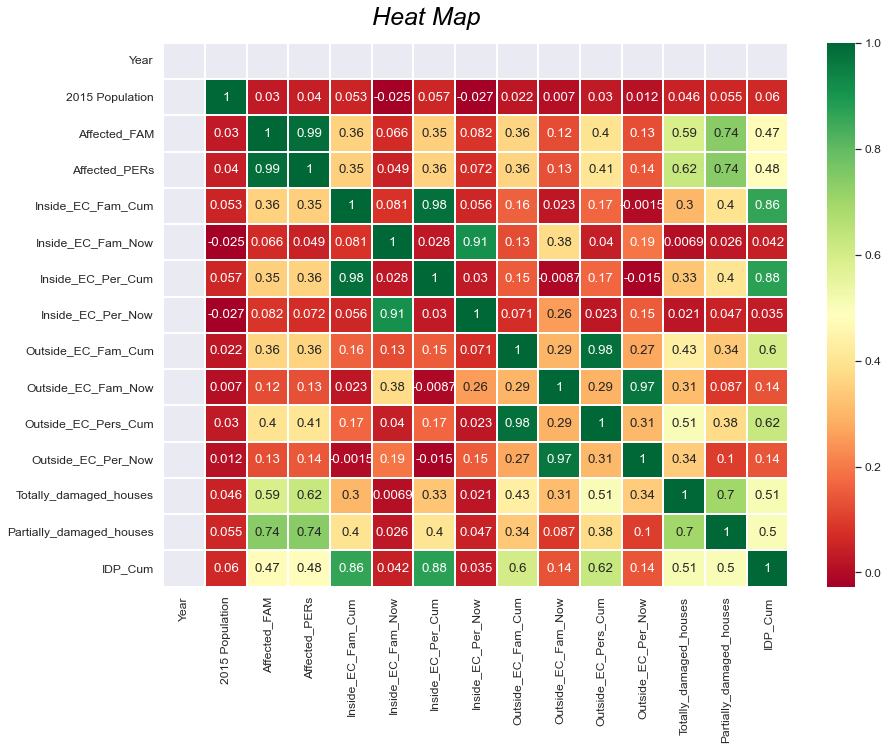

In [244]:
sns.set(font_scale=1.1)
sns.heatmap(new_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.text(5,-0.5,"Heat Map", fontsize=25, color="black", fontstyle="italic")
plt.show()

Analysis of the Heatmap

Observe first that only numeric or int data type x variables are compared, as it is obvious that alphabets and strings cannot be associated. Before we can interpret the graph, correlation must be defined.

If an increase in feature A leads to an increase in feature B, then the two features are related. A value 1 implies 100 percent positive association.

If an increase in feature A causes a decrease in feature B, then the two features are inversely related. A correlation value of -1 represents an optimal negative correlation.

Assume that two traits are highly or completely correlated, so that a change in one induces a change in the other. This means that the content of both features is equivalent, with minimum or no deviations. This is known as MultiColinearity because both variables contain almost identical data.

Do you think we should use both of these, even though one is redundant? While creating or training models, we should attempt to avoid duplicate features, as doing so reduces training time and gives a number of additional advantages. However, if the data related to people or the number of individuals affected, such as Total fatalities, Number of injured, etc., it would be an exception. Even if they have a strong link, they may still give useful information for the study.

The previous heatmap reveals that several of the characteristics are connected. There is a relationship between Affected FAM and Affected PERs with a correlation of 0.99. Even if they have a significant association, we may still use them for analysis if they provide information about a country in the data set.

<h3><b>p6. Data Analysis</b></h3>

A. Determine the top 5 typhoons from 2019 that brought the greatest number of infrastructure casualties to the Provinces in the Philippines based from Totally Damaged Houses x variable. 

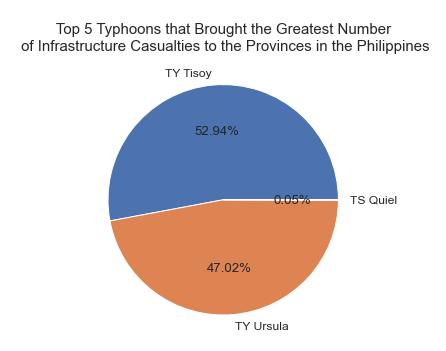

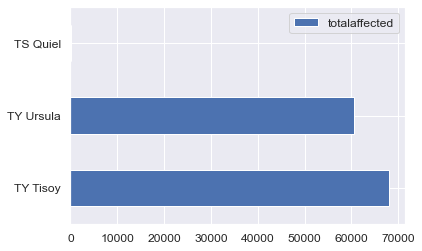

In [245]:
cyclone=new_df.groupby("Incident")
dhouse=cyclone["Totally_damaged_houses"].sum()
typ=pd.DataFrame(dhouse)

#graphing of data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
storms = ['TY Tisoy', 'TY Ursula', 'TS Quiel']
damages = [68104,60483,59]
ax.pie(damages, labels = storms,autopct='%1.2f%%')
plt.title("\n Top 5 Typhoons that Brought the Greatest Number \n of Infrastructure Casualties to the Provinces in the Philippines",
         fontsize=15)
plt.show()

#data graphing 
totalaffected = [68104, 60483, 59]
index = ['TY Tisoy', 'TY Ursula', 'TS Quiel']
df = pd.DataFrame({'totalaffected': totalaffected,
                   'Province': index}, index=index)
ax = df.plot.barh(y='totalaffected')

Typhoon Tisoy has the most desctructive impact on the houses in every region in the Philippines from 2019 with a 68,104 in number. WhileTY Ursula has the second highest number with 60,483 housing damaged. Why did this happened? 

A recent Harvard research found that despite the fact that the Philippines is one of the most disaster-prone nations in the world, the majority of Filipino households feel unprepared for catastrophes and natural hazards due to a lack of financial resources.

In 2017, Harvard Humanitarian Initiative (HHI) DisasterNet Philippines conducted the first survey of its type to gauge household preparation for disasters, reaching 4,368 families around the country (Enano, 2019). According to the survey report, just 36% of respondents felt completely prepared for disasters, while 33% reported being moderately prepared.
The other third of respondents reported to be just minimally or not at all prepared for natural disasters such as typhoons, earthquakes, floods, and landslides. Over nine million Filipinos have been impacted by a natural catastrophe in the previous five years, according to the HHI. However, over 47 percent of respondents indicated they had made no preparations for these disasters. Despite the fact that the majority of respondents claimed to have discussed emergency preparations with family members, the majority do not have "go bags" or emergency bags or even first aid kits, according to the survey.

In [246]:
TYTisoy = new_df[new_df['Incident'] == 'TY Tisoy']
  
SortedData= TYTisoy.sort_values(by='Incident',ascending=True)
result= SortedData.head(5)
display(result)

,Region,Province,City_Mun,Year,Incident,Date Occurred,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
247,REGION III (CENTRAL LUZON),Aurora,Baler (capital),2019,TY Tisoy,2019-11-30,39562,1,8.0,1.0,0,8.0,0.0,0.0,0.0,0.0,0,0,0.0,8
417,REGION V (BICOL REGION),Camarines Sur,San Jose,2019,TY Tisoy,2019-11-30,40623,1473,6301.0,1343.0,0,5713.0,0.0,130.0,0.0,588.0,0,114,4068.0,6301
418,REGION V (BICOL REGION),Camarines Sur,Sipocot,2019,TY Tisoy,2019-11-30,64855,2288,9346.0,2288.0,0,9346.0,0.0,0.0,0.0,0.0,0,136,1382.0,9346
419,REGION V (BICOL REGION),Camarines Sur,Siruma,2019,TY Tisoy,2019-11-30,17764,902,3788.0,845.0,0,3540.0,0.0,57.0,0.0,248.0,0,47,783.0,3788
420,REGION V (BICOL REGION),Camarines Sur,Tigaon,2019,TY Tisoy,2019-11-30,55272,1264,5341.0,1264.0,0,5341.0,0.0,0.0,0.0,0.0,0,413,6514.0,5341


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Baler, Aurora (capital)'),
  Text(1, 0, 'San Jose, Camarines Sur'),
  Text(2, 0, 'Sipocot, Camarines Sur'),
  Text(3, 0, 'Siruma, Camarines Sur'),
  Text(4, 0, 'Tigaon, Camarines Sur\t')])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


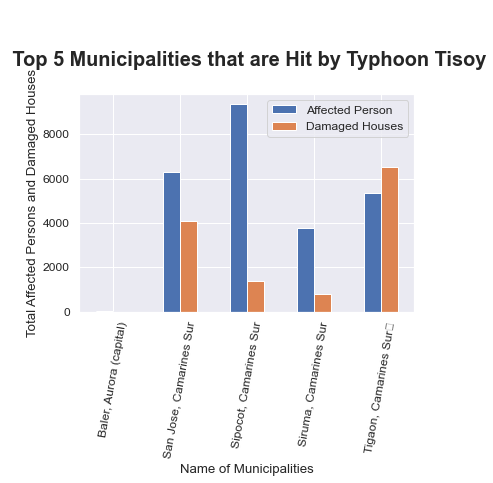

In [247]:
Person = [8.0, 6301.0, 9346.0, 3788.0, 5341.0]
Houses = [0.0, 4068.0, 1382.0, 783.0, 6514.0]
index = ['Baler, Aurora (capital)', 'San Jose, Camarines Sur', 'Sipocot, Camarines Sur','Siruma, Camarines Sur', 'Tigaon, Camarines Sur	']
df = pd.DataFrame({'Affected Person': Person,
                   'Damaged Houses': Houses}, index=index)




ax = df.plot.bar(rot=0)
plt.title("\n\n Top 5 Municipalities that are Hit by Typhoon Tisoy\n", fontsize=20, loc="center", fontweight="bold")

plt.xticks(rotation="80", horizontalalignment="center")

plt.ylabel("Total Affected Persons and Damaged Houses")
plt.xlabel("Name of Municipalities")
plt.xticks(rotation="80")

<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From the graph above, it can be concluded that most of the municipalities who were greatly affected by Typhoon Tisoy is from Camarines Sur, Bicol Region. These municipalities includes San Jose, Sipocol, Sinuma, and Tigaon. </p>

<p align='justify'>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In the aftermath of Typhoon Tisoy, the Bicol area (Region 5) was hit particularly severely, with over 1,200,000 people impacted and over 256,000 homes damaged or destroyed. According to 2018 data, 27 percent of Bicol's population lives below the poverty line, and its primary economic activities include fishing and farming. Prior to Typhoon Tisoy, there were significant risks among the affected population, notably among low-income households dwelling in high-risk regions and in buildings built of lightweight materials (Humanitarian Country Team, 2019). The region's geographic location renders it susceptible to natural disasters, and several regions of the region were affected by Typhoon Nina in 2017 and Typhoon Usman in 2018, prompting the communities to create emergency planning and response plans that rely largely on their own resources. </p>

In [248]:
TYUrsula = new_df[new_df['Incident'] == 'TY Ursula']
  
SortedData= TYUrsula.sort_values(by='Incident',ascending=True)
result= SortedData.head(5)
display(result)

,Region,Province,City_Mun,Year,Incident,Date Occurred,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
516,MIMAROPA REGION,MARINDUQUE,GASAN,2019,TY Ursula,2019-12-23,34828,3,7.0,0.0,0,0.0,0.0,3.0,0.0,7.0,0,0,0.0,7
625,REGION VIII (EASTERN VISAYAS),LEYTE,TANAUAN,2019,TY Ursula,2019-12-23,55021,8407,13098.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,568,7839.0,0
626,REGION VIII (EASTERN VISAYAS),LEYTE,TOLOSA,2019,TY Ursula,2019-12-23,20978,5524,27620.0,817.0,0,3268.0,0.0,0.0,0.0,0.0,0,152,5306.0,3268
627,REGION VIII (EASTERN VISAYAS),LEYTE,BARUGO,2019,TY Ursula,2019-12-23,32745,8632,34932.0,102.0,0,376.0,0.0,0.0,0.0,0.0,0,76,2572.0,376
628,REGION VIII (EASTERN VISAYAS),LEYTE,CAPOOCAN,2019,TY Ursula,2019-12-23,33617,6705,21599.0,1.0,0,4.0,0.0,0.0,0.0,0.0,0,420,5598.0,4


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GASAN, MARINDUQUE'),
  Text(1, 0, 'TANAUAN, LEYTE'),
  Text(2, 0, 'TOLOSA, LEYTE'),
  Text(3, 0, 'BARUGO, LEYTE'),
  Text(4, 0, 'CAPOOCAN, LEYTE')])

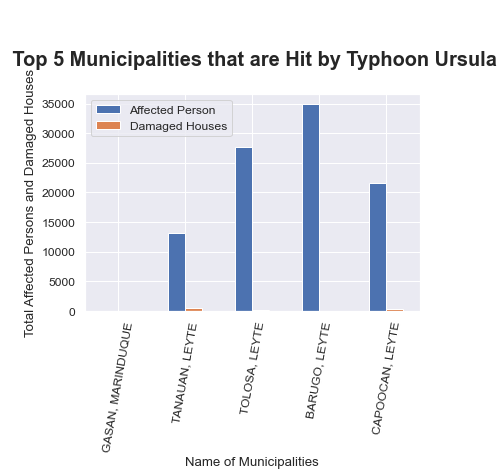

In [249]:
Person = [7.0, 13098.0, 27620.0, 34932.0, 21599.0]
Houses = [0.0, 568, 152, 76, 420]
index = ['GASAN, MARINDUQUE', 'TANAUAN, LEYTE', 'TOLOSA, LEYTE','BARUGO, LEYTE', 'CAPOOCAN, LEYTE']
df = pd.DataFrame({'Affected Person': Person,
                   'Damaged Houses': Houses}, index=index)




ax = df.plot.bar(rot=0)
plt.title("\n\n Top 5 Municipalities that are Hit by Typhoon Ursula\n", fontsize=20, loc="center", fontweight="bold")

plt.xticks(rotation="80", horizontalalignment="center")

plt.ylabel("Total Affected Persons and Damaged Houses")
plt.xlabel("Name of Municipalities")
plt.xticks(rotation="80")

B. Acquire the data about the Provinces who had the greatest number of affected individuals per typhoon (Affected_Pers). 

,Affected_PERs
Province,
LEYTE,772162.0
CAPIZ,622951.0
Northern Samar,602234.0
AKLAN,504447.0
SAMAR (WESTERN SAMAR),483308.0


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000., 900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

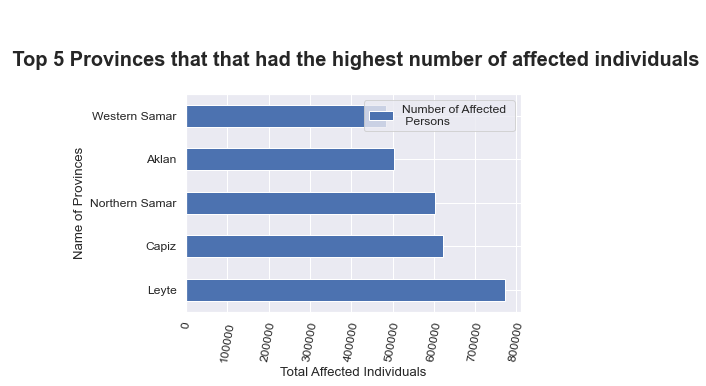

In [250]:
#top 5 Provinces from 2019 that brought the greatest number of affected individuals. 
ByProvince= new_df.groupby('Province')
TotalData = ByProvince['Affected_PERs'].sum()
data= pd.DataFrame(TotalData)
SortedData= data.sort_values(by='Affected_PERs',ascending=False)
result= SortedData.head(5)
display(result)

#data graphing 
totalaffected = [772162, 622951, 602234, 504447, 483308]
index = ['Leyte', 'Capiz', 'Northern Samar',
         'Aklan', 'Western Samar']
df = pd.DataFrame({'totalaffected': totalaffected,
                   'Province': index}, index=index)
ax = df.plot.barh(y='totalaffected')
plt.legend(["Number of Affected \n Persons"])
plt.title("\n\n Top 5 Provinces that that had the highest number of affected individuals\n", fontsize=20, loc="center", fontweight="bold")

plt.xticks(rotation="80", horizontalalignment="center")

plt.ylabel("Name of Provinces")
plt.xlabel("Total Affected Individuals")
plt.xticks(rotation="80")

Based on the results reported, the impacted population by province in the Philippines in 2019 is as follows:
<pre>
LEYTE 772, 162
CAPIZ 622951.0
Northern Samar 602234.0
AKLAN 504447.0
SAMAR (WESTERN SAMAR) 483308.0
</pre>
What do these provinces lack in terms of disaster preparedness, particularly for Typhoons?

According to the  Policy Brief - Senate Economic Planning Office (2017), a large proportion of individuals impacted by typhoons are due to the inability of line agencies and LGUs to conduct DRRM responsibilities . The inability of line agencies and LGUs to adopt DRRM responsibilities is an often stated problem in Philippine disaster management. Insufficient personnel, lack of technical expertise and comprehension, limited financial resources, and lack of technology, such as a multihazard early warning system, are among the causes. The LGUs lack the technical expertise and resources necessary to fulfill their statutory responsibilities. The DILG-Bureau of Local Government Supervision's 2013 national table assessment on LGU compliance with RA No. 10121 revealed that just 23 percent of LGUs in flood-prone regions are prepared for catastrophes in terms of knowledge, institutional capacity, and coordination.

In [251]:
Leyte = new_df[new_df['Province'] == 'LEYTE']
  
SortedData= Leyte.sort_values(by='Date Occurred',ascending=True)
result= SortedData.head(5)
display(result)

,Region,Province,City_Mun,Year,Incident,Date Occurred,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
619,REGION VIII (EASTERN VISAYAS),LEYTE,ALANGALANG,2019,TY Ursula,2019-12-23,55235,5019,11680.0,0.0,0,0.0,0.0,3464.0,0.0,11680.0,0,569,4450.0,11680
639,REGION VIII (EASTERN VISAYAS),LEYTE,CALUBIAN,2019,TY Ursula,2019-12-23,31228,7799,29059.0,147.0,0,744.0,0.0,0.0,0.0,0.0,0,317,7255.0,744
640,REGION VIII (EASTERN VISAYAS),LEYTE,LEYTE,2019,TY Ursula,2019-12-23,40639,6142,30457.0,998.0,0,4233.0,0.0,0.0,0.0,0.0,0,315,5803.0,4233
641,REGION VIII (EASTERN VISAYAS),LEYTE,SAN ISIDRO,2019,TY Ursula,2019-12-23,31641,9245,36980.0,394.0,0,2020.0,0.0,0.0,0.0,0.0,0,454,5406.0,2020
642,REGION VIII (EASTERN VISAYAS),LEYTE,TABANGO,2019,TY Ursula,2019-12-23,34195,8496,36542.0,422.0,0,1608.0,0.0,0.0,0.0,0.0,0,467,8029.0,1608


Text(0, 0.5, 'Affected Variables')

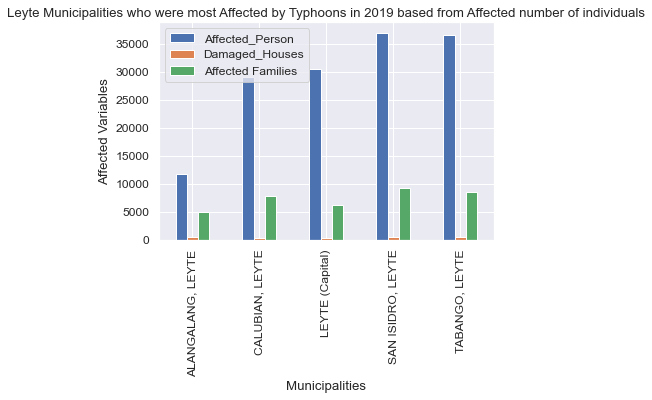

In [252]:
plotdata = pd.DataFrame({
    "Affected_Person":[11680.0, 29059.0	, 30457.0, 36980.0, 36542.0],
    "Damaged_Houses":[569, 317, 315, 454, 467],
    "Affected Families":[5019, 7799, 6142, 9245, 8496]
    }, 
    index=["ALANGALANG, LEYTE", "CALUBIAN, LEYTE", "LEYTE (Capital)", "SAN ISIDRO, LEYTE", "TABANGO, LEYTE"]
)
plotdata.plot(kind="bar")
plt.title("Leyte Municipalities who were most Affected by Typhoons in 2019 based from Affected number of individuals")
plt.xlabel("Municipalities")
plt.ylabel("Affected Variables")

<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to Therese Mae Auman, as reported by the Asian Institute of Management (n.d.), Western Visayas, including Leyte, were severely weak in two important areas: data banking and community preparation. She saw that local administrations struggled to retain systematic data and records on prior disasters. Local Government Units in her area of responsibility do not have a database with information about prior catastrophes from which they may quickly acquire and use the material when drafting local plans. There is no progress in limiting property loss or potential deaths as a result of a community's experience with damaging storms due to the absence of data storage, which increases the likelihood that history will repeat again. The lack of community preparedness was mostly a communication issue. While populations were educated and supplied with information about evacuating as crises unfolded, execution remained a constant obstacle. There were no planned evacuation plans in place to rapidly and efficiently mobilize neighborhood people. Communities are informed of the dangers in their region, and several drills have already been done. However, according to Auman, once a calamity hits, everyone scrambles.</p>

C. Get the information that shows the top 5 municipalities who were most affected by typhoons from the year 2019 based from the Affected_PERs x variable.  

,Affected_PERs
City_Mun,
CITY OF ROXAS (CAPITAL),168580.0
Daraga (Locsin),126595.0
CITY OF CATBALOGAN (CAPITAL),122572.0
CITY OF TACLOBAN (CAPITAL),119918.0
Catarman (capital),106424.0


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

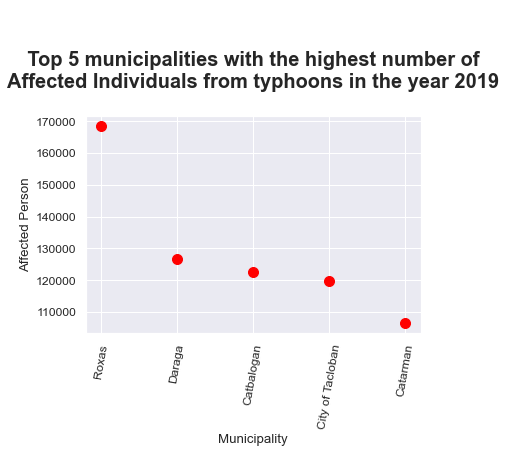

In [253]:
ByMuni= new_df.groupby('City_Mun')
TotalData=ByMuni['Affected_PERs'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Affected_PERs',ascending=False)
result= SortedData.head(5)
display(result)

data={'Municipality':['Roxas', 'Daraga', 'Catbalogan',
'City of Tacloban', 'Catarman'],
      'Affected Person':[ 168580, 126595, 122572, 119918, 106424]}
  
# Load data into DataFrame
df = pd.DataFrame(data = data);
  
#Graphing of Data
df.plot.scatter(x = 'Municipality', y = 'Affected Person', s = 100, c = 'red');

plt.title("\n\n Top 5 municipalities with the highest number of \nAffected Individuals from typhoons in the year 2019\n", fontsize=20, loc="center", fontweight="bold")

plt.xticks(rotation="80", horizontalalignment="center")


From the top 5 municipalities in the Philippines who had the most affected individuals in the year 2019, the following results were as follows;
<pre> 
CITY OF ROXAS (CAPITAL)	168580.0
Daraga (Locsin)	126595.0
CITY OF CATBALOGAN (CAPITAL)	122572.0
CITY OF TACLOBAN (CAPITAL)	119918.0
Catarman (capital)	106424.0
</pre>

The ineffective execution of rules and regulations in these municipalities contributed to their severe typhoon damage. In low-lying and high-risk regions, a proliferation of establishments and informal settlers has resulted from a lack of administration and lax implementation of disaster-related rules (no building zones). According to the 2009 Annual Report of the Global Facility for Disaster Reduction and Recovery (GFDRR), as stated by Policy Brief - Senate Economic Planning Office (2017), several constructions do not comply with the Building Code and Environmental Compliance Certificates (ECCs). In certain local government units, building regulations and standards are weakened to minimize construction costs. In disaster-prone locations, a lack of control in the construction of buildings and other physical structures contributes to an increase in community risk.

In [254]:
Roxas = new_df[new_df['City_Mun'] == 'CITY OF ROXAS (CAPITAL)']
  
SortedData= Roxas.sort_values(by='Date Occurred',ascending=True)
result= SortedData.head(5)
display(result)

,Region,Province,City_Mun,Year,Incident,Date Occurred,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
581,REGION VI (WESTERN VISAYAS),CAPIZ,CITY OF ROXAS (CAPITAL),2019,TY Ursula,2019-12-23,167003,33556,168580.0,968.0,24,4884.0,74.0,6823.0,21.0,34115.0,105,7791,25765.0,38999


In [255]:
PhilData = new_df
PhilData

,Region,Province,City_Mun,Year,Incident,Date Occurred,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
0,Region XIII (CARAGA),Agusan del Norte,City of Butuan (capital),2019,TD Amang,2019-01-19,337063,269,1383.0,269.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
1,Region XIII (CARAGA),Agusan del Norte,Jabonga,2019,TD Amang,2019-01-19,23184,14,59.0,14.0,0,59.0,0.0,0.0,0.0,0.0,0,0,0.0,59
2,Region XIII (CARAGA),Agusan del Sur,La Paz,2019,TD Amang,2019-01-19,28217,1386,6930.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
3,Region XIII (CARAGA),Agusan del Sur,Talacogon,2019,TD Amang,2019-01-19,38374,777,3414.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
4,Region XIII (CARAGA),Dinagat Islands,Basilisa (Rizal),2019,TD Amang,2019-01-19,36880,75,266.0,75.0,0,266.0,0.0,0.0,0.0,0.0,0,0,0.0,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,REGION VII (CENTRAL VISAYAS),CEBU,MADRIDEJOS,2019,TY Ursula,2019-12-23,36429,1869,9345.0,0.0,0,0.0,0.0,96.0,96.0,480.0,480,0,0.0,480
683,REGION VII (CENTRAL VISAYAS),CEBU,MEDELLIN,2019,TY Ursula,2019-12-23,55332,6653,33265.0,0.0,0,0.0,0.0,111.0,111.0,555.0,555,92,2361.0,555
684,REGION VII (CENTRAL VISAYAS),CEBU,SAN REMIGIO,2019,TY Ursula,2019-12-23,57557,6,30.0,0.0,0,0.0,0.0,3.0,3.0,15.0,15,0,0.0,15
685,REGION VII (CENTRAL VISAYAS),CEBU,SANTA FE,2019,TY Ursula,2019-12-23,28603,2809,14045.0,0.0,0,0.0,0.0,176.0,176.0,880.0,880,0,0.0,880





## The Centre for Research on the Epidemiology of Disasters' Data set about the American Typhoons (2000-2022)
  

a1. Analysis of the features and X variables.

In [256]:
# casualties of storms in America based in EMDAT datasets
data = pd.read_excel(r'2000-2022-emdat_public_2022_04_24_query_uid-XuKaJG.xlsx', sheet_name="emdat data")
data.info() # info() function was used to get an initial reading from the excel sheet data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dis No                                       722 non-null    object 
 1   Year                                         722 non-null    int64  
 2   Seq                                          722 non-null    int64  
 3   Glide                                        143 non-null    object 
 4   Disaster Group                               722 non-null    object 
 5   Disaster Subgroup                            722 non-null    object 
 6   Disaster Type                                722 non-null    object 
 7   Disaster Subtype                             685 non-null    object 
 8   Disaster Subsubtype                          280 non-null    object 
 9   Event_Name                                   391 non-null    object 
 10  Co

<pre>
As what have seen from the information about the American continent's dataset, there are 53 columns. And this EDA project do not need to include of these rows for the analysis. Thus, selection of variables using .loc function was used for. The only columns that were needed for the analysis is the following:

Dis No	        --> object data type
Year            --> int64 data type
Disaster Type   --> object data type
Disaster Subtype--> object data type	
Event_Name	    --> object data type
Country		    --> object data type
Region          --> object data type
Total_Deaths	--> int64 data type
No_Injured	    --> int64 data type
No_Affected	    --> int64 data type
No_Homeless	    --> int64 data type
Total_Affected  --> int64 data type	
Reconstruction_Costs,_Adjusted_('000_US$)--> int64 data type	
Insured_Damages_('000_US$)	--> int64 data type
Insured_Damages,_Adjusted_('000_US$)	--> int64 data type
Total_Damages_('000_US$)	--> int64 data type
Total_Damages,_Adjusted_('000_US$)	--> int64 data type
Geo Locations   --> int64 data type
Dis Mag Value   --> int64 data type
</pre>

<h4><b>Types Of Features </b></h4>

<b>Nominal Features:</b>
<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A nominal variable is one that describes an unordered term, label, or category. Sexual orientation and housing type are instances of nominal variables.</p>

<p5>Nominal Features in the dataset: Disaster Group, Disaster Subgroup, Disaster Type, Disaster Subtype, Event Name, Country.</p5>

<b>Continous Feature:</b>
<p align='justify'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If a feature may take values between any two points or between the lowest and maximum values in the features column, it is continuous.</p>

<p5>Continous Features in the dataset: Year, Dis Mag Value, Total_Deaths, No_Injured, No_Affected, No_Homeless, Total_Affected, Reconstruction_Costs_('000_US$), Insured_Damages_('000_US$), Insured_Damages,_Adjusted_('000_US$), Total_Damages_('000_US$), and Total_Damages,_Adjusted_('000_US$)</p5>


a2. Selection of X variables to be used for the analysis.

In [257]:

#*************************NEW DATAFRAME***************************************
    
#selecting all needed and specific columns and creating new dataframe named data
data = data.iloc[:,[0,1,6,7,9,10, 12,34, 35, 36, 37,38, 40, 41, 42, 43, 44, 49, 22]].copy()

 a3. Converting the data from the excel sheet data set to a pandas data frame.

In [258]:
df = pd.DataFrame(data) #convert dataset excel into dataframe

display(df)



,Dis No,Year,Disaster Type,Disaster Subtype,Event_Name,Country,Region,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,"Reconstruction_Costs,_Adjusted_('000_US$)",Insured_Damages_('000_US$),"Insured_Damages,_Adjusted_('000_US$)",Total_Damages_('000_US$),"Total_Damages,_Adjusted_('000_US$)",Geo Locations,Dis Mag Value
0,2000-0839-ARG,2000,Storm,Convective storm,NaN,Argentina,South America,1.0,NaN,NaN,430.0,430.0,NaN,NaN,NaN,NaN,NaN,"Buenos Aires, Buenos Aires D.f. (Adm1).",96.0
1,2000-0607-ARG,2000,Storm,Convective storm,NaN,Argentina,South America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chubut, Neuquen, Rio Negro, Santa Cruz (Adm1).",NaN
2,2000-0642-BLZ,2000,Storm,Tropical cyclone,Keith,Belize,Central America,14.0,570.0,62000.0,NaN,62570.0,NaN,NaN,NaN,277460.0,436604.0,"Belize, Cayo, Corozal, Orange Walk (Adm1).",215.0
3,2000-0420-CAN,2000,Storm,Convective storm,NaN,Canada,Northern America,11.0,140.0,NaN,700.0,840.0,NaN,10000.0,15736.0,13000.0,20456.0,Division No. 8 (Adm2).,300.0
4,2001-0012-ARG,2001,Storm,NaN,NaN,Argentina,South America,4.0,150.0,500.0,NaN,650.0,NaN,NaN,NaN,NaN,NaN,Buenos Aires (Adm1).,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2021-0166-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,NaN,2.0,90.0,NaN,92.0,NaN,NaN,NaN,500000.0,500000.0,"Alabama, Louisiana, Mississippi (Adm1).",NaN
718,2021-0797-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,93.0,100.0,NaN,NaN,100.0,NaN,4000000.0,4000000.0,5200000.0,5200000.0,"Michigan, Wisconsin (Adm1). Caldwell, Craighea...",310.0
719,2021-0059-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,100000.0,"Maine, New Jersey, New York, Pennsylvania, Vir...",NaN
720,2021-0815-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,5.0,NaN,120.0,NaN,120.0,NaN,NaN,NaN,1900000.0,1900000.0,"Missouri, Nebraska, Wisconsin (Adm1). El Paso,...",160.0


a4. Dataframe Normalization

In [259]:
 #From the dataframe above, there are numerous disaster types such as; Convective storm, Tropical cyclone, Extra-tropical storm, and many other classifications. The focus of this analysis is directed only for the Tropical cyclone subtype as it provide specific names from every typhoons that hit the American continent. To achieve this result, a new dataframe named 'new_df' was created based from the rows of 'Disaster Subtype' with the string value of 'Tropical cyclone'.

new_df = df.loc[df['Disaster Subtype'] == 'Tropical cyclone']

a5. Data Cleaning

In [260]:
new_df.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 2 to 721
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     386 non-null    object 
 1   Year                                       386 non-null    int64  
 2   Disaster Type                              386 non-null    object 
 3   Disaster Subtype                           386 non-null    object 
 4   Event_Name                                 386 non-null    object 
 5   Country                                    386 non-null    object 
 6   Region                                     386 non-null    object 
 7   Total_Deaths                               279 non-null    float64
 8   No_Injured                                 52 non-null     float64
 9   No_Affected                                255 non-null    float64
 10  No_Homeless               

In [261]:
new_df.isnull().sum() #checking for total null values


Dis No                                         0
Year                                           0
Disaster Type                                  0
Disaster Subtype                               0
Event_Name                                     0
Country                                        0
Region                                         0
Total_Deaths                                 107
No_Injured                                   334
No_Affected                                  131
No_Homeless                                  342
Total_Affected                               110
Reconstruction_Costs,_Adjusted_('000_US$)    384
Insured_Damages_('000_US$)                   309
Insured_Damages,_Adjusted_('000_US$)         309
Total_Damages_('000_US$)                     174
Total_Damages,_Adjusted_('000_US$)           174
Geo Locations                                 11
Dis Mag Value                                259
dtype: int64

In [262]:
# From the results above, there are a number of null values that need to be cleaned. And pandas can only clean the dataframe if all rows contain values specially for integers. All object data types are already contain no null values, in which they are all strings in data type. Thus, fillna() function was used to replace null values to zero for smooth data analysis.
new_df = new_df.fillna(0) # replace NaN with zero value

In [263]:
                   
#After changing the null values in every in valued columns on the dataframe, astype() function was used to change data types of specific columns with dictionary indexing.
convert_datatypes = {"Total_Deaths":int,
                     "No_Injured":int,
                     "No_Affected":int,
                     "No_Homeless":int,
                     "Total_Affected":int,
                     "Reconstruction_Costs,_Adjusted_('000_US$)": int,
                     "Insured_Damages_('000_US$)": int,
                     "Insured_Damages,_Adjusted_('000_US$)": int,
                     "Total_Damages_('000_US$)":int,
                     "Total_Damages,_Adjusted_('000_US$)": int}
new_df= new_df.astype(convert_datatypes) #converting columns datatypes

new_df.isnull().sum() #checking for total null values


#After all of these data cleaning processes, the final dataframe for analysis were created and named "new_df" again. And from the results below from using isnull() function, there are now no null values from the data frame. Thus, data analysis would be smooth and no errors can occur on the latter part of this EDA.


Dis No                                       0
Year                                         0
Disaster Type                                0
Disaster Subtype                             0
Event_Name                                   0
Country                                      0
Region                                       0
Total_Deaths                                 0
No_Injured                                   0
No_Affected                                  0
No_Homeless                                  0
Total_Affected                               0
Reconstruction_Costs,_Adjusted_('000_US$)    0
Insured_Damages_('000_US$)                   0
Insured_Damages,_Adjusted_('000_US$)         0
Total_Damages_('000_US$)                     0
Total_Damages,_Adjusted_('000_US$)           0
Geo Locations                                0
Dis Mag Value                                0
dtype: int64

In [264]:
# First, drop duplicates function was used to find the exact names and nubmer of countries that were included on the record without duplicates. There are 38 countries in total. 

Country_names = new_df["Country"].drop_duplicates() 
#Creating a new dataframe called `Country_names` that contains the unique values of the `Country` column in the `new_df` dataframe

data = pd.DataFrame(Country_names) #Creating a new dataframe called `data` that contains the unique values of the `Country` column in the `new_df` dataframe.
data.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.


Event_names = new_df["Event_Name"].drop_duplicates() 
data = pd.DataFrame(Event_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2 to 597
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  38 non-null     object
dtypes: object(1)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 2 to 714
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event_Name  146 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


a6. Statistical Overview and Correlation Analysis of the featured X variables.'



In [265]:
new_df.describe()


,Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,"Reconstruction_Costs,_Adjusted_('000_US$)",Insured_Damages_('000_US$),"Insured_Damages,_Adjusted_('000_US$)",Total_Damages_('000_US$),"Total_Damages,_Adjusted_('000_US$)",Dis Mag Value
count,386.000000,386.000000,386.000000,3.860000e+02,386.000000,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,386.000000
mean,2010.626943,31.103627,14.090674,1.392622e+05,2705.746114,1.419820e+05,3.711630e+03,8.054095e+05,9.823549e+05,1.989300e+06,2.399497e+06,53.321244
std,6.354522,190.160355,140.435425,7.302957e+05,21212.655314,7.313961e+05,6.265824e+04,4.643771e+06,5.762915e+06,1.032081e+07,1.265023e+07,84.410102
min,2000.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2005.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2010.000000,3.000000,0.000000,1.500000e+03,0.000000,2.156500e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,1.530000e+03,0.000000
75%,2017.000000,9.750000,0.000000,2.560000e+04,0.000000,2.964850e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+05,3.920610e+05,110.000000
max,2021.000000,2754.000000,2620.000000,1.000000e+07,300000.000000,1.000000e+07,1.211597e+06,6.000000e+07,8.325076e+07,1.250000e+08,1.734391e+08,300.000000


In [266]:
new_df.describe(include =['O'])


,Dis No,Disaster Type,Disaster Subtype,Event_Name,Country,Region,Geo Locations
count,386,386,386,386,386,386,386
unique,386,1,1,146,38,4,309
top,2000-0642-BLZ,Storm,Tropical cyclone,Hurricane 'Irma',Mexico,Caribbean,Administrative unit not available (Adm1).
freq,1,386,386,16,68,173,14


In [267]:
#Calculating the correlation between the variables in the dataframe.

corr = new_df.corr()**2
corr.Total_Affected.sort_values(ascending=False)




Total_Affected                               1.000000
No_Affected                                  0.999160
Total_Deaths                                 0.005527
Total_Damages,_Adjusted_('000_US$)           0.005315
Total_Damages_('000_US$)                     0.004892
No_Homeless                                  0.004368
Insured_Damages,_Adjusted_('000_US$)         0.004157
Insured_Damages_('000_US$)                   0.003826
Dis Mag Value                                0.001986
No_Injured                                   0.001434
Year                                         0.000204
Reconstruction_Costs,_Adjusted_('000_US$)    0.000129
Name: Total_Affected, dtype: float64

From the correlation list above, the 'No_Affected' or the number of affected individuals by typhoons has the highest correlation with the Total_Affected variable.

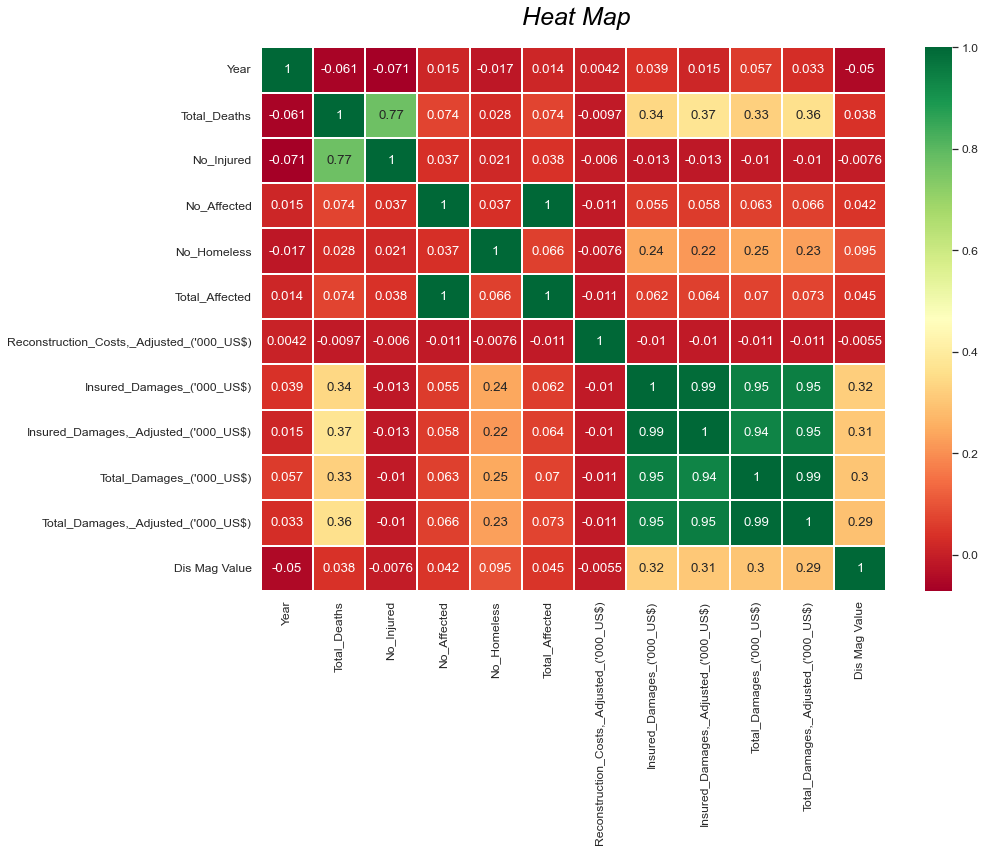

In [268]:
sns.set(font_scale=1.1)
sns.heatmap(new_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.text(5,-0.5,"Heat Map", fontsize=25, color="black", fontstyle="italic")
plt.show()



### Interpreting the Heatmap

First, observe that only numeric characteristics or int data type x variables are compared, as it is evident that alphabets and strings cannot be correlated. Before we can comprehend the plot, we must first define correlation.

If a rise in feature A causes an increase in feature B, then the two features are positively connected. A value 1 signifies 100% positive correlation.

If a rise in feature A leads to a reduction in feature B, then the two features are negatively linked. A value of -1 indicates an ideal negative correlation.

Let's assume that two characteristics are highly or perfectly connected, so that a rise in one causes an increase in the other. This indicates that both features include information that is quite comparable, with minimal or no differences. This is referred to as MultiColinearity since both variables contain almost identical information.

Do you believe that we should utilize both of them, even though one of them is redundant? While creating or training models, we should strive to eliminate duplicate features, as doing so decreases training time and provides several other benefits. However, if the data pertains to persons or the number of impacted individuals, such as Total fatalities, Number of injured, etc., it would be exempt. Even if they have a strong correlation, they might nevertheless provide significant insight for the investigation.

Now we can see from the preceding heatmap that some of the features are correlated. One association exists between Total Affected, No.Homeless, and No.Affected, which is the strongest having 1 correlation. Even if they have a strong correlation, we may still utilize them for analysis since they can provide us with information about a nation in the data set.




a7. Data Analysis


For the year 2000-2021,  a total of 146 hurricanes were being recorded that hit the whole American continents, having Hurricane Katrina, Harvey, Maria, Irma, and Ida as top 5 strongest hurricanes in that timeline in terms of the total damage. 


To determine the mitigation plans of affected countries that may help in formulating new mitigation plan for the Philippines, our group decided to look at the countries ranking with the :
-highest number of total affected individuals
-lowest total deaths
-and lowest total cost of damage.


The United States is adept at coping with storms on the continent after they have struck. America is significantly more prepared for storms now than it was in 2005, when Hurricane Katrina struck (The Economists, 2018). Thus, the Philippine government should examine the methods and structures it employs to further enhance our response to and mitigation of typhoons.


##### A. Determine the top 5 typhoons from 2000-2022 that brought the greatest number of casualties to the in America as a whole based from the Total Affected and Total Damages, Adjusted ('000 US$) x variables. 

,Total_Affected
Event_Name,
Hurricane 'Irma',10138842
Hurricane 'Eta',7152272
Hurricane Michelle,5900012
Frances,5008450
"Hurricane ""Gustav""",2633282


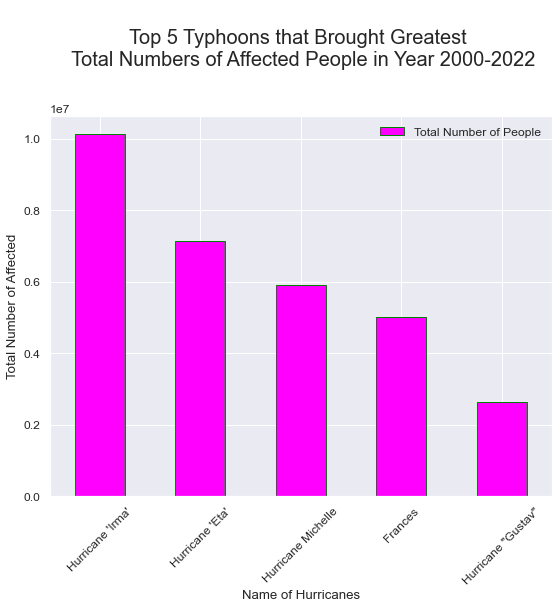

,Country,Total_Affected
526,Cuba,10000000
587,United States of America (the),70000
556,Haiti,40092
529,Anguilla,15000
527,Dominican Republic (the),6300
597,Sint Maarten (Dutch part),5040
530,Antigua and Barbuda,1800
561,Saint Kitts and Nevis,500
596,Saint Martin (French Part),110
531,Bahamas (the),0


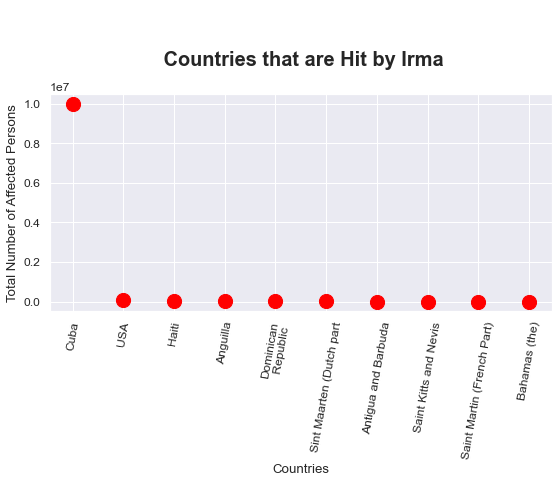

In [269]:
from IPython.display import display_html 
import matplotlib.pyplot as plt
import numpy as np

# Acquiring the top 5 typhoons from 2000-2022 that brought the greatest number of casualties in America as a whole based from the Total Affected.

TopTyphoonAffected = new_df.groupby('Event_Name')
TotalAff = TopTyphoonAffected['Total_Affected'].sum()
data_TotalAff = pd.DataFrame(TotalAff)
TotalAff_SortedData = data_TotalAff.sort_values(by='Total_Affected',ascending=False)
TotalAff_result = TotalAff_SortedData.head(5)
display(TotalAff_result)

#graphing of data of top 5 typhoons from 2000-2022 that brought the greatest number of casualties in America as a whole based from the Total Affected.
TotalAff_result.plot(kind="bar",color="magenta",edgecolor="green", figsize=(9,7))
plt.xticks(rotation="45", horizontalalignment="center")
plt.xlabel("Name of Hurricanes")
plt.ylabel("Total Number of Affected")
plt.title("\nTop 5 Typhoons that Brought Greatest \n Total Numbers of Affected People in Year 2000-2022\n\n",
           fontsize=20, loc="center")
plt.legend(["Total Number of People"], frameon=False)
plt.show()
#Saving visualizations in TIFF file with 300 dpi
#plt.savefig('Top5TypNoAff.tiff', transparent=True, dpi=300)



#Countries affected by Irma
import matplotlib.pyplot as plt

Irma = new_df.loc[new_df['Event_Name'] == "Hurricane 'Irma'"]
Irma = Irma.sort_values(by='Total_Affected',ascending=False)
Irma = Irma.head(10)
Irma = Irma.iloc[:,[5, 11 ]].copy()
AffectedCountries = pd.DataFrame(Irma)
display(AffectedCountries)

data={"Countries":["Cuba","USA", "Haiti", "Anguilla", "Dominican\n Republic","Sint Maarten (Dutch part", "Antigua and Barbuda","Saint Kitts and Nevis", "Saint Martin (French Part)","Bahamas (the)"],
      "Total_Affected": [10000000, 70000, 40092, 15000, 6300, 5040, 1800, 500, 110, 0]}
  
data=pd.DataFrame(data=data)
#Graphing of Data
data.plot(x = 'Countries', y = 'Total_Affected',kind="scatter",s=200, c = 'red', figsize=(9,4));
plt.title("\n\n Countries that are Hit by Irma\n", fontsize=20, loc="center", fontweight="bold")
plt.xticks(rotation="80", horizontalalignment="center")
plt.ylabel("Total Number of Affected Persons")
plt.show()

 For the interpretation of the graph that were shown above. The graph showed the top 5 hurricanes that brought the greatest number of total affected individual in different countries in Northern and Southern America. Hurricane Irma tops the list with the greatest number of total affected individual when it landed on year 2017. 
 


Irma was a category five storm at its height, with winds reaching 295 km/h (185mph). Irma's top wind speeds were comparable with the second-strongest maximum winds ever for an Atlantic storm, according to Phil Klotzbach, research scientist at Colorado State University's Department of Atmospheric Science (Asian Institute of Management, 2017). Hurricane Irma wreaked havoc on the Caribbean and then the United States' coastal states, affecting more than ten countries and territories. The International Federation of Red Cross and Red Crescent Societies (IFRC) reports varying levels of damage and needs in Antigua and Barbuda, the British, Dutch, and French Antilles, the Bahamas, Cuba, the Dominican Republic, Haiti, Saint Kitts and Nevis, and the United States and territories, among other places.

Most Caribbean hurricanes arise over the Atlantic, with some reaching as far as West Africa's coast. Warm water and moist air, both of which are abundant in the Caribbean during the wet summer months, charge them. Tropical storms develop, and thunderstorms form as the warm air rises. Hurricanes are just a massive cluster of thunderstorms. The faster warm air rises, the more it churns the surface, resulting in massive waves and strong winds at sea (Simmons, n.d.).

Because the Caribbean is one of the world's most hazard-prone regions, preparedness is essential. When people think of hurricane preparedness, they usually think of stocking up on food and boarding up windows just before a storm hits. However, as climate change continues to increase the intensity of hurricanes that form each year, hurricane preparedness is now required before hurricane season even begins. They propose three responses to the region's increasing frequency and severity of hurricane damage: (1) revising building codes on a regular basis for each hurricane season, (2) supporting climate-smart coastal development, and (3) building climate-proof buildings or improving buildings to withstand hurricanes (Donovan, 2017)

,"Total_Damages,_Adjusted_('000_US$)"
Event_Name,
Katrina,173439092
Hurricane Harvey,105018585
Hurricane 'Maria',77031684
Hurricane 'Irma',75295009
Tropical storm 'Ida',65100000


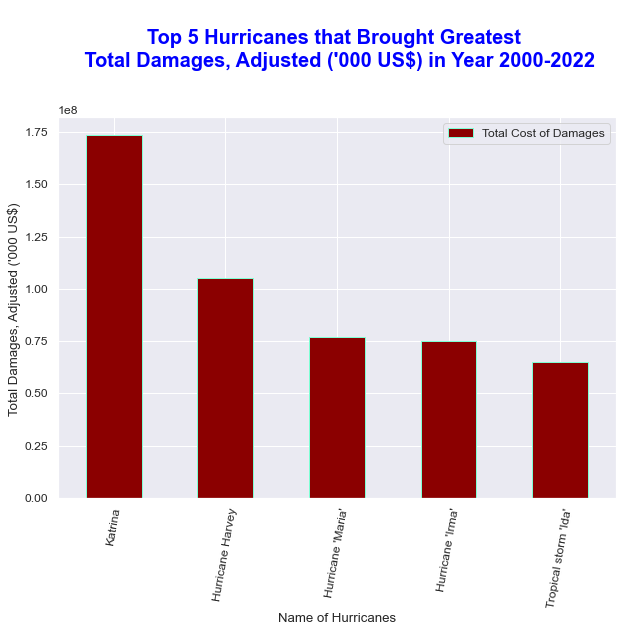

In [270]:
# Acquiring the top 5 typhoons from 2000-2022 that brought the greatest number of casualties to the in America as a whole Total Damages, Adjusted ('000 US$)
TopTyphoonDamage = new_df.groupby('Event_Name')
TotalDam = TopTyphoonDamage["Total_Damages,_Adjusted_('000_US$)"].sum()
data_TotalDam = pd.DataFrame(TotalDam)
TotalDam_SortedData = data_TotalDam.sort_values(by="Total_Damages,_Adjusted_('000_US$)",ascending=False)
TotalDam_result = TotalDam_SortedData.head(5)
display(TotalDam_result)

#graphing of data of Top 5 Typhoons that Brought Greatest Total Damages, Adjusted ('000 US$) in Year 2000-2022.
TotalDam_result.plot(kind="bar",color="darkred", figsize=(10,7), edgecolor="aquamarine")
plt.xlabel("Event_Name")
plt.ylabel("Total Damages, Adjusted ('000 US$) ")
plt.title("\nTop 5 Hurricanes that Brought Greatest \n Total Damages, Adjusted ('000 US$) in Year 2000-2022\n\n",
          fontsize=20, loc="center", fontweight="bold", c="blue")
plt.xticks(rotation="80")
plt.xlabel("Name of Hurricanes")
plt.legend(["Total Cost of Damages"])
plt.show()

The graph shows the top 5 hurricanes that brought the greatest damages in from year 2000-2022 where Hurricane Katrina tops the list.

   Hurricane Katrina is considered the costliest hurricane that hit the US from the year 2000-2022. It has 125 million dollars total cost of damage. However, it was adjusted for inflation, where Katrina caused an economic damage of 170 billion US dollars, $53 billion of which was insured (Buchholz,2020). 
   
   According to Constible (n.d.), despite recent advances in areas like Florida, America's physical infrastructure, from highways and bridges to their public water systems, is not ready for the rigors of increasingly deadly hurricane seasons. He stated that it is critical to strengthen both structures such as power poles and bridges, as well as the processes by which they operate existing structures and plan to build new ones. He stated that one critical first step is to incorporate climate change into every major infrastructure decision, rather than planning for past disasters. Even so, protecting the low-income and minority groups most susceptible to climate change will be insufficient. 
   
   Infrastructure policies and projects must rectify decades of systemic underinvestment in those regions and account for the inequitable impacts of disruptions like power outages to be truly climate-smart. Hurricane-affected communities have started taking steps to strengthen their resilience, but numerous factors can influence their choices (Young, 2020). Elevating, purchasing, and restoring dwellings; flood-proofing public buildings; repairing and upgrading vital infrastructure; erecting flood barriers; and amending construction codes are all actions conducted after hurricanes. The costs and benefits of community resilience initiatives can influence a community's decision to pursue them. The frequency, severity, and location of future disasters, as well as the amount of federal help available after a disaster, all influence these costs and benefits .
   

B. Acquire the data about the top 5 countries who had the greatest number of deaths, injured, and affected individuals from the typhoons on the year 2000-2022. 

,Total_Deaths
Country,
Haiti,4343
United States of America (the),2912
Guatemala,1896
Mexico,664
El Salvador,405


Standard Deviation of Total Deaths Columns is: 190.1603551272867
Mean of Total Deaths Columns is: 31.10362694300518


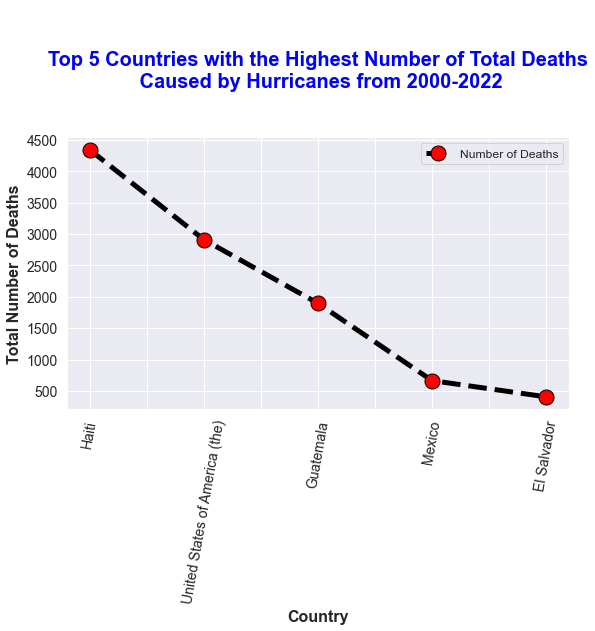

In [271]:
#Acquiring the top 5 countries with the highest number of total deaths caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryDeath = new_df.groupby('Country')
TotalData = ByCountryDeath['Total_Deaths'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Deaths',ascending=False)
result = SortedData.head(5)
display(result)

std = new_df['Total_Deaths'].std()
mean = new_df['Total_Deaths'].mean()

print("Standard Deviation of Total Deaths Columns is:", std)
print("Mean of Total Deaths Columns is:", mean)

result.plot(kind="line", ls="--", color="black",linewidth=5, marker="o",ms=15, markerfacecolor="red", figsize=(9,5))
plt.title("\n\nTop 5 Countries with the Highest Number of Total Deaths\n Caused by Hurricanes from 2000-2022\n\n",
         fontsize=20, loc="center", fontweight="bold", c="blue")
plt.xticks(rotation="80", fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country", fontsize=16, fontweight="bold")
plt.ylabel("Total Number of Deaths", fontsize=16, fontweight="bold")
plt.legend(["Number of Deaths"])
plt.show()

,No_Injured
Country,
Dominica,150
Mexico,368
Belize,570
Guatemala,581
Haiti,3393


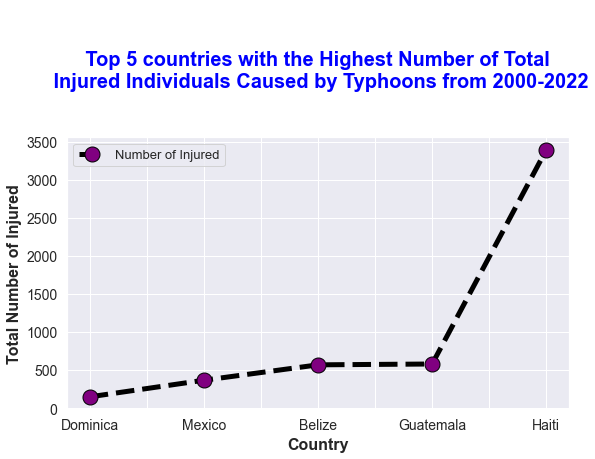

In [272]:
#Acquiring the top 5 countries with the highest number of total injured individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryInjured = new_df.groupby('Country')
TotalData = ByCountryDeath['No_Injured'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='No_Injured',ascending=True)
result = SortedData.tail(5)
display(result)

result.plot(kind="line", ls="--", color="black",linewidth=5, marker="o",ms=15, markerfacecolor="purple", figsize=(9,5))
plt.title("\n\n Top 5 countries with the Highest Number of Total \n Injured Individuals Caused by Typhoons from 2000-2022\n\n",
          fontsize=20, loc="center", fontweight="bold", c="blue")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Country", fontsize=16, fontweight="bold")
plt.ylabel("Total Number of Injured", fontsize=16, fontweight="bold")
plt.legend(["Number of Injured"], fontsize=13)
plt.show()

Haiti tops the records as the country with the highest total number of deaths and injured cause by hurricanes and tropical storms from the year 2000 to 2021, as shown in the two graphs.

Because Haiti is located in the hurricane belt in the Caribbean, it is susceptible to powerful storm during hurricane seasons. In an article written by Social (2018), the combination of Hurricane Ivan and Jeanne in 2004 bring damage to the country, causing massive flooding that killed less than 3000 people and injured thousands of citizens. In 2008, four hurricanes hit Haiti — Fey, Gustav, Hannah, and Ike, resulting to killing of nearly 800 people, 300 missing, and more than 500 injured (Perito, 2008). In 2016, Haiti was devastated by a category 4 hurricane named Matthew, which killed almost 600 people.

Deforestation is considered as the biggest factor for these catastrophes that contribute to the intensive flooding during the hurricane seasons, wiping the land and cause the death of the people. As mentioned by Masters (n.d.), Haiti is one of the poorest countries in the Western Hemisphere. Having expensive oil, cutting and burning of the trees serves as fuel and energy source of the country. Back in 1974, 25% of the forest remained that allows to withstand strong storms but in 2004, only 1.4% of the forests left, that even the not strong storms, caused massive flooding to the country due to days of rains.

,Total_Affected
Country,
Cuba,20202593
United States of America (the),11279675
Mexico,6176551
Honduras,5380420
Guatemala,3841847


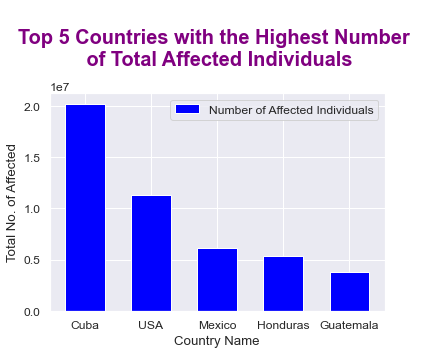

In [273]:
#Acquiring the top 5 countries with the highest number of total affected individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountry = new_df.groupby('Country')
TotalData = ByCountry['Total_Affected'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Affected',ascending=False)
result = SortedData.head(5)
display(result)

#graphing the Country and Total Affected
data = {'Cuba':20202593,'USA':11279675, 'Mexico':6176551, 'Honduras':5380420, 'Guatemala':3841847}
Country_name = list(data.keys())
Affected_values = list(data.values())

plt.bar(Country_name, Affected_values, color ='blue', width = 0.6)
plt.xlabel("Country Name")
plt.ylabel("Total No. of Affected")
plt.title("\nTop 5 Countries with the Highest Number \n of Total Affected Individuals\n",
         fontsize=20, loc="center", fontweight="bold", c="purple")
plt.legend(["Number of Affected Individuals"])
plt.show()

Following on the graph is another graph that shows the total cost damage on the countries where it landed. Irma affected Cuba the most having 10 million people affected, followed by the USA having 70,000 people affected. For the countries with highest total number of affected individuals for the entire 22 years, Cuba ranks top 1 at the list. According to the United Nations (2004), Cuba is currently regarded as an example for developing country hurricane risk management. Education is an important element of their preparation because catastrophe readiness, prevention, and response are all covered in the general education curriculum. People are constantly informed and trained to deal with natural risks in schools, universities, and workplaces. All Cubans are trained how to behave as hurricanes approach the country from an early age. Every year, they also hold a two-day hurricane risk reduction training program, complete with simulated exercises and specific preparation steps. They close schools to keep families together, and instead of having people and their belongings travel miles to shelters, they use 'community evacuation' in particularly isolated places — where individual buildings or homes have been strengthened exclusively for that purpose. Finally, the Cuban Civil Defense, a modest organization at the top, incorporates nearly everyone at the municipal level; with participation from public health and the Red Cross, local government and institutions are well prepared with risk assessments and disaster preparation. The data demonstrate the success of Cuba's disaster preparation and mitigation strategies: just 35 people have died as a result of the 16 hurricanes and tropical storms that have hit the island since 2001, with 17 of those killed by Hurricane Dennis in 2005. They are continually learning from their mistakes. Cuba wanted to improve their subterranean electricity and water lines in 2008, as they were constantly seriously damaged.

##### C. Acquire the data about the name of countries who had the least number of deaths, injured, and affected individuals from the typhoons on 2000-2022.

,Total_Deaths
Country,
Saint Kitts and Nevis,0
Antigua and Barbuda,1
Trinidad and Tobago,1
Barbados,2
Cayman Islands (the),2
Martinique,2
Canada,3
Anguilla,4
Turks and Caicos Islands (the),4


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'Bermuda'),
  Text(0.0, 0, 'Saint Kitts and Nevis'),
  Text(2.0, 0, 'Trinidad and Tobago'),
  Text(4.0, 0, 'Cayman Islands (the)'),
  Text(6.0, 0, 'Canada'),
  Text(8.0, 0, 'Turks and Caicos Islands (the)'),
  Text(10.0, 0, 'Brazil'),
  Text(12.0, 0, '')])

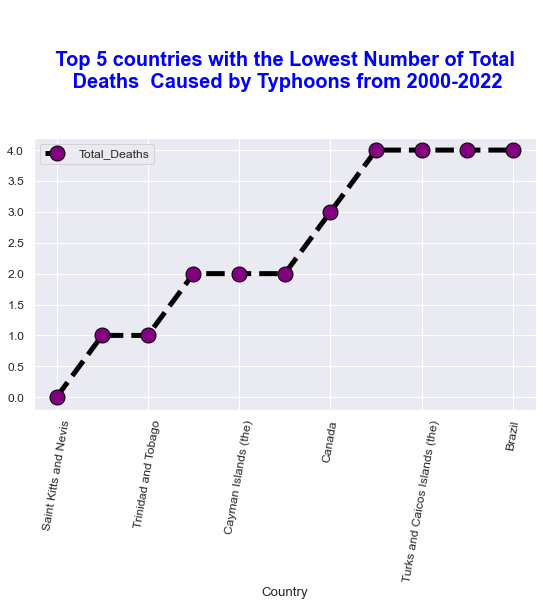

In [274]:
#Acquiring the top 11 countries with the lowest number of total deaths caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryDeath = new_df.groupby('Country')
TotalData = ByCountryDeath['Total_Deaths'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Deaths',ascending=True)
result = SortedData.head(11)
display(result)

result.plot(kind="line", ls="--", color="black",linewidth=5, marker="o",ms=15, markerfacecolor="purple", figsize=(9,5))
plt.title("\n\n Top 5 countries with the Lowest Number of Total \n Deaths  Caused by Typhoons from 2000-2022\n\n",
          fontsize=20, loc="center", fontweight="bold", c="blue")
plt.xticks(rotation="80")

The countries with lowest total number of affected individuals from the year 2000-2021 are not frequently hit by hurricanes, sometimes have zero hurricane record in year.

For the countries with the lowest total deaths for the entire 22 years, Saint Kitts and Nevis ranks 1. In their Hurricane Emergency Plan, they have ALERT, WATCH, WARNING, and ALL CLEAR phase. During the alert phase, 72 hours before the experiencing hurricane winds, the government meet and asses the country's state of preparednes for hurricane. They advice the public to listen to all weather advisories and make contact with relevant departments to ensure that all are conservant with the plan. During the WARNING PHASE, 24 Hours before Experiencing Hurricane Winds, they notify heads of missions, regional and international embassies/missions and agencies with agreements for assistance.All relevant persons are to be notified of  declaration of a Warning.Together with the Police in their District make use of the Police public address system to warn residents of the Districts of the expected time the hurricane will strike and repeat Radio messages on the location of shelters. During the blow of the hurricane, the need to monitor and report the situations as possible. When the event passed, they will proceed to ALL CLEAR phase and will assess the damage. This well-formulated mitigation plan shows success as the countries have zero deaths from year 2000-2021 (Nevis Disaster Management Department, n.d.).

In [275]:
#Acquiring the top 19 countries with the lowest number of total injured individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryInjured = new_df.groupby('Country')
TotalData = ByCountryDeath['No_Injured'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='No_Injured',ascending=True)
result = SortedData.head(20)
display(result)


,No_Injured
Country,
Anguilla,0
Turks and Caicos Islands (the),0
Trinidad and Tobago,0
Saint Lucia,0
Saint Kitts and Nevis,0
Saint Barthélemy,0
Puerto Rico,0
Panama,0
Nicaragua,0


In [276]:
#Acquiring the top 5 countries with the lowest number of total affected individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountry = new_df.groupby('Country')
TotalData = ByCountry['Total_Affected'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Affected',ascending=True)
result = SortedData.head(5)
display(result)


,Total_Affected
Country,
Virgin Island (U.S.),0
Bermuda,0
Saint Barthélemy,0
Virgin Island (British),0
Martinique,8


D. Get the information that shows the top 5 countries who were most affected in terms of economy (dollars) by typhoons from the year 2000-2022. 

,"Total_Damages,_Adjusted_('000_US$)"
Country,
United States of America (the),758704028
Puerto Rico,75979583
Mexico,34988807
Cuba,13638965
Bahamas (the),7117040


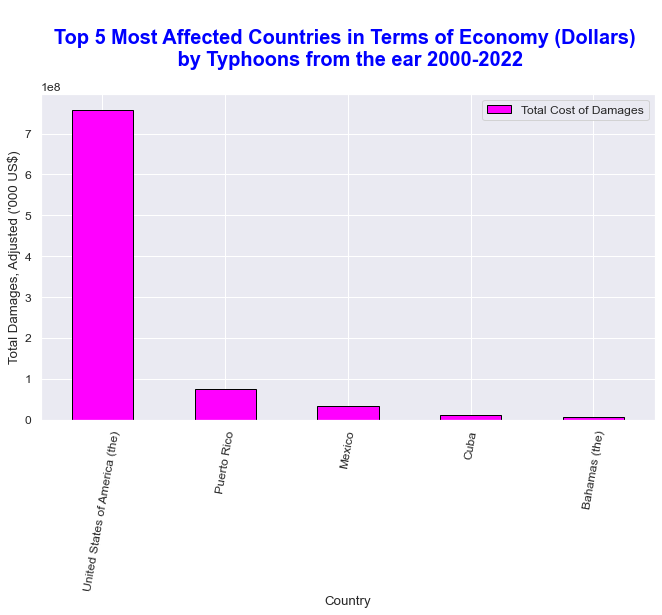

,"Total_Damages,_Adjusted_('000_US$)"
Country,
Virgin Island (U.S.),0
Venezuela (Bolivarian Republic of),0
Saint Barthélemy,0
Trinidad and Tobago,1435
Barbados,7474


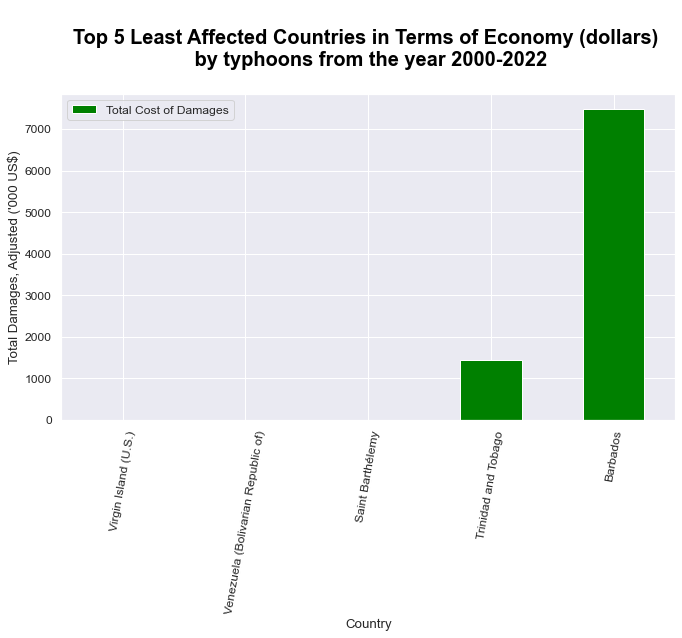

In [277]:
#sorting data for most affected in terms of economy
countrynames = new_df.groupby('Country')
totaldollars = countrynames["Total_Damages,_Adjusted_('000_US$)"].sum()
td_frame = pd.DataFrame(totaldollars)
SortedData_dollars = td_frame.sort_values(by="Total_Damages,_Adjusted_('000_US$)",ascending=False)
result_dollars = SortedData_dollars.head(5)
display(result_dollars)

#graphing of data

result_dollars.plot(kind="bar",color="magenta", figsize=(11,6), edgecolor="black")
plt.xticks(rotation="80")
plt.xlabel("Country")
plt.ylabel("Total Damages, Adjusted ('000 US$)")
plt.title("\nTop 5 Most Affected Countries in Terms of Economy (Dollars) \n by Typhoons from the ear 2000-2022\n",
         fontsize=20, loc="center", fontweight="bold", c="blue")
plt.legend(["Total Cost of Damages"])
plt.show()



#sorting data for least affected in terms of Economy
SortedData_dollars = td_frame.sort_values(by="Total_Damages,_Adjusted_('000_US$)",ascending=True)
less_dollars = SortedData_dollars.head(5)
display(less_dollars)

#graphing of data
less_dollars.plot(kind="bar",color="green", figsize=(11,6))
plt.xticks(rotation="80")
plt.xlabel("Country")
plt.ylabel("Total Damages, Adjusted ('000 US$)")
plt.title("\nTop 5 Least Affected Countries in Terms of Economy (dollars) \n by typhoons from the year 2000-2022\n",
         fontsize=20, loc="center", fontweight="bold", c="black")
plt.legend(["Total Cost of Damages"])
plt.show()

## INTERPRETATION

The first graph shows the countries that were most affected in terms of econom since 2000 to 2022. It shows that USA is the most affected having more that 700 billion total cost of damages. It is followed by Puerto Rico in the list having more than 70 billion total cost of damages. Mexico is third on the list having more than 34 billion cost of damages in total for 22 years. Fourth is Cuba having more than 13 billion cost of total damages for 22 years. And lastly, the Bahamas having more that 7 billion dollars of total cost of damages.

For the second graph, it depicts the countries having the lowest total cost of damages in the entire 22 years. Virgin Islands, Venezuela, and Saint Barthelemy shows no record of total cost of damages, it was followed by Trinidad and Tobago having just more that a million for the entire 22 years. Lastly, Barbados is the fifth country having the lowest total cost of damages with a total of more than 7 million.

E. Determine which top 5 typhoons are the strongest based from the x variable ‘Dis Mag Scale’ or the magnitude of the disaster at its epicenter with the values in kph (kilometer per Hour).

In [278]:
ByTyphoons = new_df.iloc[:,[4, 18]] 
data = pd.DataFrame(ByTyphoons)
SortedData = data.sort_values(by='Dis Mag Value',ascending=False)
result = SortedData.head(5)
display(result)


,Event_Name,Dis Mag Value
587,Hurricane 'Irma',300.0
617,Tropical cyclone 'Dorian',298.0
530,Hurricane 'Irma',295.0
527,Hurricane 'Irma',285.0
186,Katrina,280.0
